<a href="https://colab.research.google.com/github/Stepeech/NNLearn/blob/main/%D0%9F%D0%A07_2_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №7. Использование автоэнкодера для решения задач семантической сегментации. Часть 2

[**Ссылка на код с пары**](https://colab.research.google.com/drive/1kcXnm6ZNrjkjUHlkgAIFBmxDd_6lNIHd?usp=sharing)

## Пример создания модели с Unet-подобной архитектурой

In [ ]:
from tensorflow.keras import Model, Input
from keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, Cropping2D, Softmax, Conv2DTranspose
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model

In [ ]:
def mini_u_net(image_shape, num_of_classes):
  
  input_image = Input(image_shape)

  # Encoder
  
  conv1_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_1')(input_image)
  conv1_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_2')(conv1_1)
  
  pool_1 = MaxPooling2D(name = 'pool_1')(conv1_2)
  
  conv2_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_1')(pool_1)
  conv2_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_2')(conv2_1)
  
  pool_2 = MaxPooling2D(name = 'pool_2')(conv2_2)
  
  conv3_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_1')(pool_2)
  conv3_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_2')(conv3_1)
  
  pool_3 = MaxPooling2D(name = 'pool_3')(conv3_2)
  
  conv4_1 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_1')(pool_3)
  conv4_2 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_2')(conv4_1)
  
  
  
  # Decoder
  
  upconv5_1 = UpSampling2D(name = 'upconv5_1')(conv4_2)
  upconv5_2 = Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv5_2')(upconv5_1)
  concat_5 = concatenate([upconv5_2, conv3_2], axis = 3, name = 'concat_5') # Split Connections
  
  conv5_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_1')(concat_5)
  conv5_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_2')(conv5_1)
  
  
  upconv6_1 = UpSampling2D(name = 'upconv6_1')(conv5_2)
  upconv6_2 = Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv6_2')(upconv6_1)
  concat_6 = concatenate([upconv6_2, conv2_2], axis = 3, name = 'concat_6') # Split Connections
  
  conv6_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_1')(concat_6)
  conv6_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_2')(conv6_1)
  
  upconv7_1 = UpSampling2D(name = 'upconv7_1')(conv6_2)
  upconv7_2 = Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv7_2')(upconv7_1)
  concat_7 = concatenate([upconv7_2, conv1_2], axis = 3, name = 'concat_7') # Split Connections
  
  conv7_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_1')(concat_7)
  conv7_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_2')(conv7_1)
  
  conv8 = Conv2D(filters = num_of_classes, kernel_size = (1, 1), activation = 'softmax', name = 'conv8')(conv7_2)
  
  model = Model(inputs = input_image, outputs = conv8, name = 'model')
  
  return model

In [ ]:
unet_model = mini_u_net(image_shape = [256, 256, 3], num_of_classes = 6)

### Описание и визуализация архитектуры созданной модели

In [ ]:
unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 256, 256, 32  9248        ['conv1_1[0][0]']                
                                )                                                             

In [ ]:
unet_model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1_1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv1_1',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'C

Для визуализации архитектуры модели используется следующий код:

```
plot_model(
unet_model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)
```



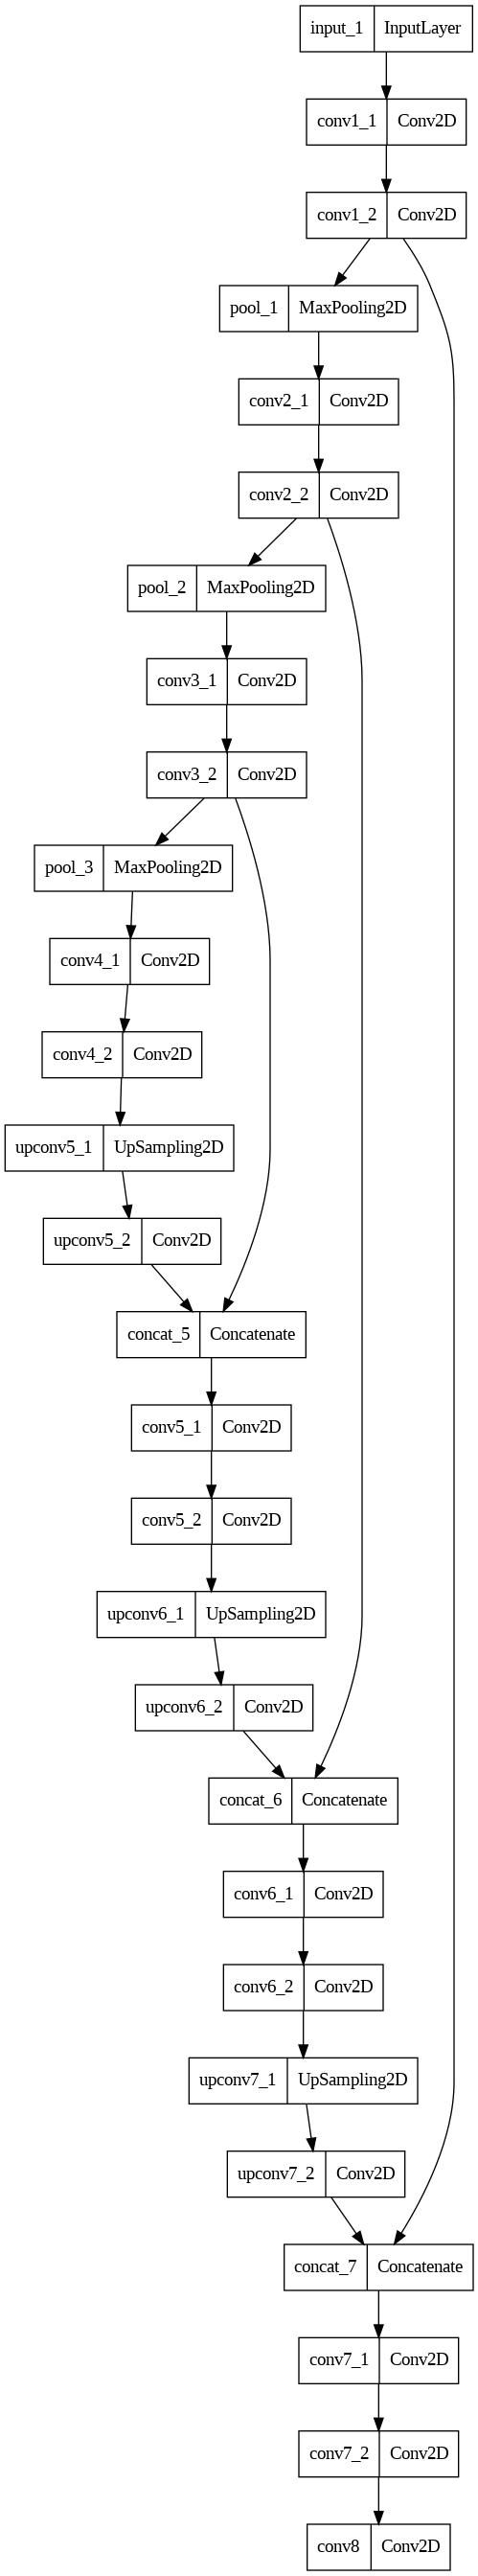

## Задание №1. Создайте модель со следующей архитектурой:

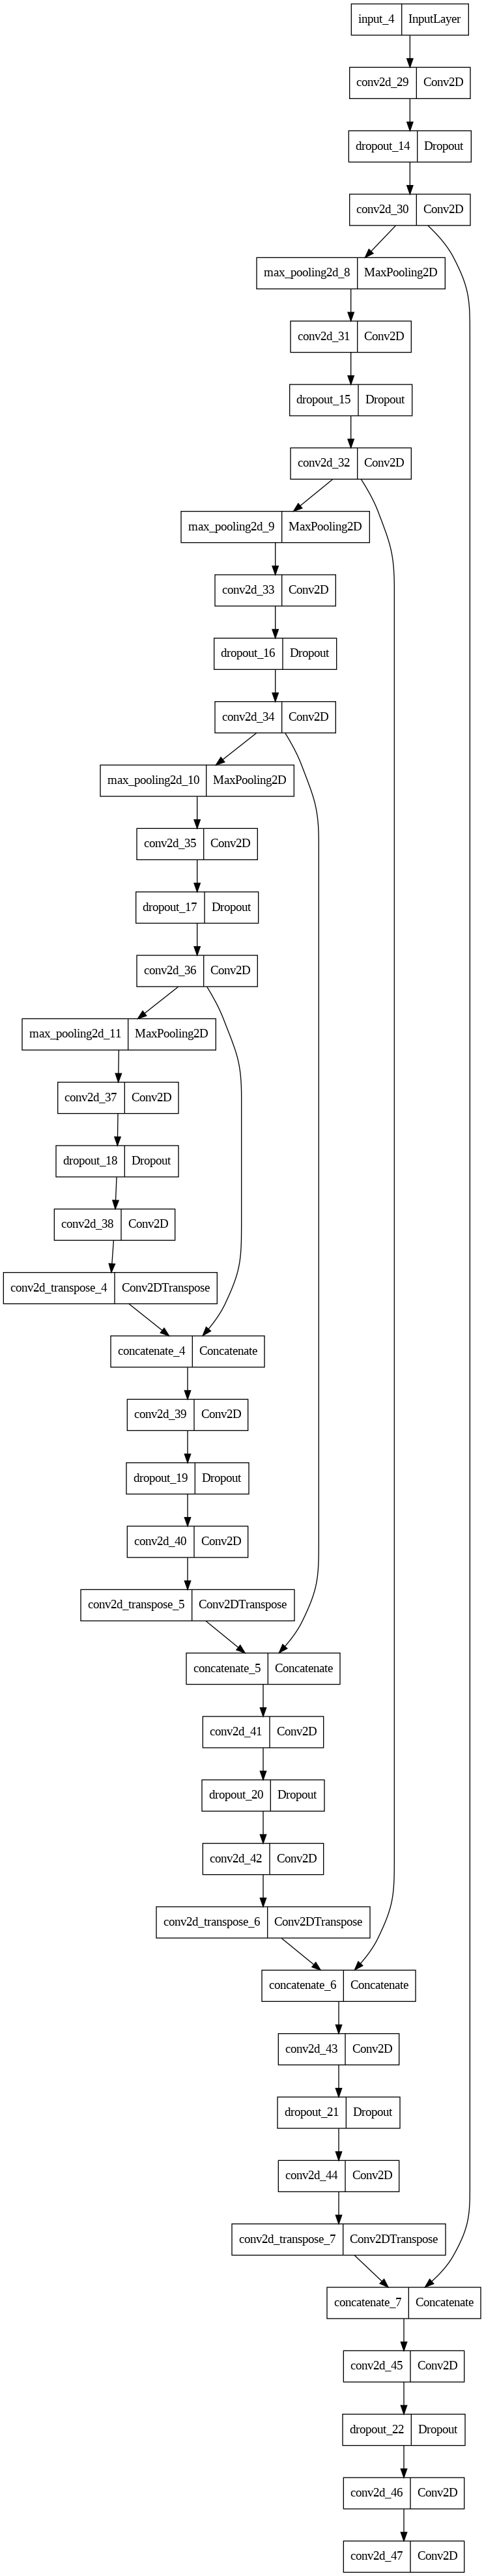

In [ ]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_29 (Conv2D)             (None, 256, 256, 16  448         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_14 (Dropout)           (None, 256, 256, 16  0           ['conv2d_29[0][0]']              
                                )                                                           

In [ ]:
model_2.get_config()

{'name': 'model_1',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_4'},
   'name': 'input_4',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_29',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d_29',
   'inbound_nodes': [[['input_4', 0, 0, {}]]]},
  {'class_name': 'Dropo

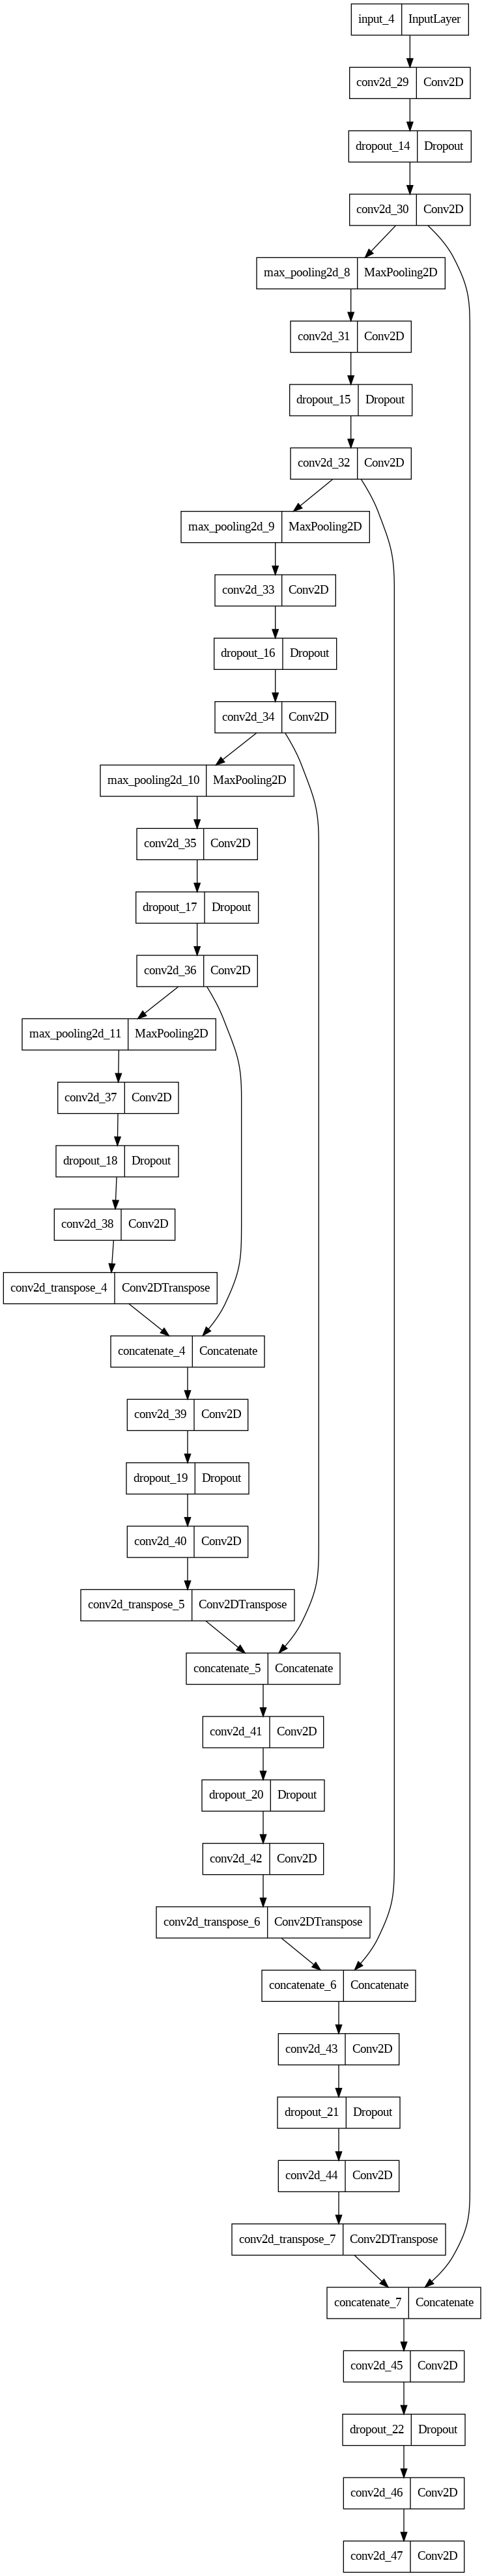

In [ ]:
plot_model(
model_2, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
from tensorflow.keras import Model, Input
from keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, Cropping2D, Softmax, Conv2DTranspose
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model

In [ ]:
def mini_u_net(image_shape, num_of_classes):
  
    input_image = Input(image_shape)
    
    conv1_1 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_1')(input_image)
    dropout1_1 = Dropout(rate=0.2)(conv1_1)
    conv1_2 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_2')(dropout1_1)

    pool_1 = MaxPooling2D(pool_size=(2,2), name = 'pool_1')(conv1_2)

    conv2_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_1')(pool_1)
    dropout2_1 = Dropout(rate=0.2)(conv2_1)
    conv2_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_2')(dropout2_1)

    pool_2 = MaxPooling2D(pool_size=(2,2), name = 'pool_2')(conv2_2)

    conv3_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_1')(pool_2)
    dropout3_1 = Dropout(rate=0.2)(conv3_1)
    conv3_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_2')(dropout3_1)

    pool_3 = MaxPooling2D(pool_size=(2,2), name = 'pool_3')(conv3_2)

    conv4_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_1')(pool_3)
    dropout4_1 = Dropout(rate=0.2)(conv4_1)
    conv4_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_2')(dropout4_1)


    pool_4 = MaxPooling2D(pool_size=(2,2), name = 'pool_4')(conv4_2)


    conv5_1 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_1')(pool_4)
    dropout5_1 = Dropout(rate=0.2)(conv5_1)
    conv5_2 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_2')(dropout5_1)
    
    
    upconv5_1 = Conv2DTranspose(filters = 128, kernel_size = (2, 2), strides=(2, 2), activation = 'linear', padding = 'same', name = 'upconv5_1')(conv5_2)

    concat_5 = concatenate([upconv5_1, conv4_2], axis = 3, name = 'concat_5') # Split Connections


    conv6_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_1')(concat_5)
    dropout6_1 = Dropout(rate=0.2)(conv6_1)
    conv6_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_2')(dropout6_1)
    upconv6_1 = Conv2DTranspose(filters = 64, kernel_size = (2, 2), strides=(2, 2), activation = 'linear', padding = 'same', name = 'upconv6_1')(conv6_2)

    concat_6 = concatenate([upconv6_1, conv3_2], axis = 3, name = 'concat_6') # Split Connections

    conv7_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_1')(concat_6)
    dropout7_1 = Dropout(rate=0.2)(conv7_1)
    conv7_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_2')(dropout7_1)
    upconv7_1 = Conv2DTranspose(filters = 32, strides=(2, 2), kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv7_1')(conv7_2)

    concat_7 = concatenate([upconv7_1, conv2_2], axis = 3, name = 'concat_7') # Split Connections

    conv8_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv8_1')(concat_7)
    dropout8_1 = Dropout(rate=0.2)(conv8_1)
    conv8_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv8_2')(dropout8_1)
    upconv8_1 = Conv2DTranspose(filters = 16, strides=(2, 2), kernel_size = (2, 2), activation = 'linear', padding = 'same', name = 'upconv8_1')(conv8_2)

    concat_8 = concatenate([upconv8_1, conv1_2], axis = 3, name = 'concat_8') # Split Connections
    

    conv9_1 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv9_1')(concat_8)
    dropout9_1 = Dropout(rate=0.2)(conv9_1)
    conv9_2 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv9_2')(dropout9_1)

    conv10 = Conv2D(filters = num_of_classes, kernel_size = (1, 1), activation = 'softmax', name = 'conv10')(conv9_2)

    model = Model(inputs = input_image, outputs = conv10, name = 'model')

    return model

In [ ]:
unet_model = mini_u_net(image_shape = [256, 256, 3], num_of_classes = 6)

In [ ]:
unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv1_1[0][0]']                
                                )                                                             

                                )                                                                 
                                                                                                  
 conv8_2 (Conv2D)               (None, 128, 128, 32  9248        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 upconv8_1 (Conv2DTranspose)    (None, 256, 256, 16  2064        ['conv8_2[0][0]']                
                                )                                                                 
                                                                                                  
 concat_8 (Concatenate)         (None, 256, 256, 32  0           ['upconv8_1[0][0]',              
                                )                                 'conv1_2[0][0]']                
          

In [ ]:
unet_model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1_1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv1_1',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'config'

## Задание №2. Обучите созданную модель для решения задачи семантической сегментации. В качестве функции потерь используйте ту, которая лучше всего показала себя в работе №6

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import segmentation_models as sm
from keras.metrics import MeanIoU
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Segmentation Models: using `keras` framework.


In [ ]:
train_img_dir = r'C:\\Users\\Stepan\\ai\\train_image\\train\\'
train_mask_dir = r'C:\\Users\\Stepan\\ai\\train_mask\\train\\'

train_img_list = sorted(os.listdir(train_img_dir))
train_msk_list = sorted(os.listdir(train_mask_dir))

train_num_images = len(os.listdir(train_img_dir))

In [ ]:
valid_img_dir = r'C:\\Users\\Stepan\\ai\\val_image\\val\\'
valid_mask_dir = r'C:\\Users\\Stepan\\ai\\val_mask\\val\\'

valid_img_list = sorted(os.listdir(valid_img_dir))
valid_msk_list = sorted(os.listdir(valid_mask_dir))

print(train_img_list)

valid_num_images = len(os.listdir(valid_img_dir))

['image_part_001.jpg_patch_00.jpg', 'image_part_001.jpg_patch_01.jpg', 'image_part_001.jpg_patch_02.jpg', 'image_part_001.jpg_patch_03.jpg', 'image_part_001.jpg_patch_04.jpg', 'image_part_001.jpg_patch_05.jpg', 'image_part_001.jpg_patch_07.jpg', 'image_part_001.jpg_patch_10.jpg', 'image_part_001.jpg_patch_11.jpg', 'image_part_001.jpg_patch_12.jpg', 'image_part_001.jpg_patch_13.jpg', 'image_part_001.jpg_patch_14.jpg', 'image_part_001.jpg_patch_15.jpg', 'image_part_001.jpg_patch_16.jpg', 'image_part_001.jpg_patch_17.jpg', 'image_part_001.jpg_patch_21.jpg', 'image_part_001.jpg_patch_22.jpg', 'image_part_001.jpg_patch_23.jpg', 'image_part_001.jpg_patch_24.jpg', 'image_part_001.jpg_patch_25.jpg', 'image_part_001.jpg_patch_26.jpg', 'image_part_001.jpg_patch_30.jpg', 'image_part_001.jpg_patch_32.jpg', 'image_part_001.jpg_patch_35.jpg', 'image_part_001.jpg_patch_37.jpg', 'image_part_001.jpg_patch_42.jpg', 'image_part_001.jpg_patch_45.jpg', 'image_part_001.jpg_patch_46.jpg', 'image_part_001.jpg

In [ ]:
Building = np.array((60, 16, 152))
Land = np.array((132, 41, 246))
Road = np.array((110, 193, 228))
Vegetation = np.array((254, 221, 58))
Water = np.array((226, 169, 41))
Unlabeled = np.array((155, 155, 155))

def rgb_to_2D_label(label):
    if len(label.shape) == 3: 
        label = label[:,:,:3]
    if len(label.shape) == 4: 
        label = label[:,:,:,:3]

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5


    if len(label.shape) == 3: 
        label_seg = label_seg[:,:,0]
    if len(label.shape) == 4: 
        label_seg = label_seg[:,:,:,0]
        
    return label_seg

In [ ]:
seed=24
batch_size= 16
n_classes=6

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def preprocess_data(img, mask, num_class):
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    mask = rgb_to_2D_label(mask)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)

def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [ ]:
train_img_path = r'C:\\Users\\Stepan\\ai\\train_image\\'
train_mask_path = r'C:\\Users\\Stepan\\ai\\train_mask\\'
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=6)

val_img_path = r'C:\\Users\\Stepan\\ai\\val_image\\'
val_mask_path = r'C:\\Users\\Stepan\\ai\\val_mask\\'
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=6)

train_steps_per_epoch = train_num_images//batch_size
val_steps_per_epoch = valid_num_images//batch_size

In [ ]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
unet_model = mini_u_net(image_shape = (256, 256, 3), num_of_classes = 6)
unet_model.compile(optimizer='adam', loss=sm.losses.categorical_focal_dice_loss, metrics=metrics)
unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 256, 256, 16  448         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 dropout_90 (Dropout)           (None, 256, 256, 16  0           ['conv1_1[0][0]']                
                                )                                                             

                                )                                                                 
                                                                                                  
 conv8_2 (Conv2D)               (None, 128, 128, 32  9248        ['dropout_97[0][0]']             
                                )                                                                 
                                                                                                  
 upconv8_1 (Conv2DTranspose)    (None, 256, 256, 16  2064        ['conv8_2[0][0]']                
                                )                                                                 
                                                                                                  
 concat_8 (Concatenate)         (None, 256, 256, 32  0           ['upconv8_1[0][0]',              
                                )                                 'conv1_2[0][0]']                
          

In [ ]:
history=unet_model.fit(
          train_img_gen,
          steps_per_epoch=train_steps_per_epoch,
          epochs=65,
          verbose=1,
          validation_steps=val_steps_per_epoch,
          validation_data=val_img_gen)

Found 411 images belonging to 1 classes.
Found 411 images belonging to 1 classes.
Epoch 1/65
25/25 [==============================] - ETA: 0s - loss: 0.8450 - accuracy: 0.5135 - iou_score: 0.1213 - f1-score: 0.1901Found 138 images belonging to 1 classes.
Found 138 images belonging to 1 classes.
25/25 [==============================] - 16s 312ms/step - loss: 0.8450 - accuracy: 0.5135 - iou_score: 0.1213 - f1-score: 0.1901 - val_loss: 0.8117 - val_accuracy: 0.5174 - val_iou_score: 0.1459 - val_f1-score: 0.2224
Epoch 2/65
25/25 [==============================] - 12s 304ms/step - loss: 0.7947 - accuracy: 0.5583 - iou_score: 0.1559 - f1-score: 0.2338 - val_loss: 0.7789 - val_accuracy: 0.5233 - val_iou_score: 0.1692 - val_f1-score: 0.2526
Epoch 3/65
25/25 [==============================] - 9s 371ms/step - loss: 0.7578 - accuracy: 0.5922 - iou_score: 0.1853 - f1-score: 0.2707 - val_loss: 0.7306 - val_accuracy: 0.6510 - val_iou_score: 0.2112 - val_f1-score: 0.3032
Epoch 4/65
25/25 [===========

In [ ]:
unet_model.save(r'C:\\Users\\Stepan\\ai\\models\\model72.h5')

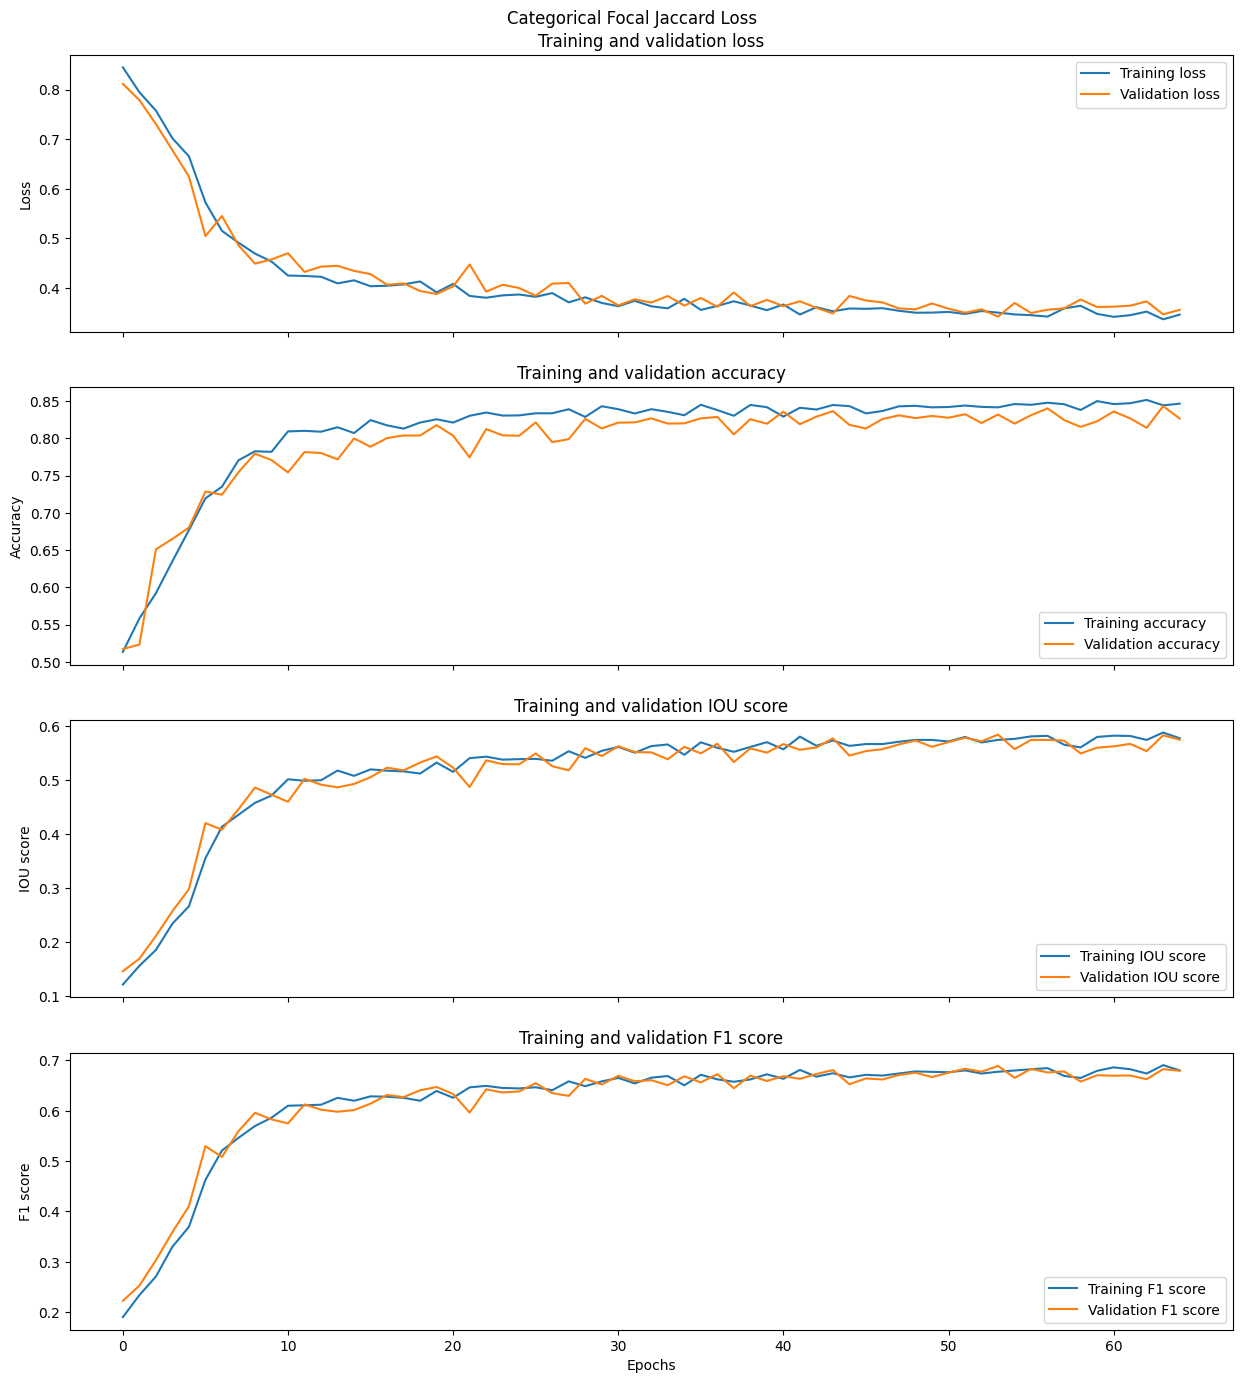

In [ ]:
def display_training(history, name):
    fig, axs = plt.subplots(4, 1, sharex=True)
    
    fig.set_figwidth(15)
    fig.set_figheight(15)
    fig.suptitle(name)
    plt.xlabel('Epochs', fontsize=10)
    
    axs[0].set_title("Training and validation loss")
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Training loss', 'Validation loss'], loc="upper right")

    axs[1].set_title("Training and validation accuracy")
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Training accuracy', 'Validation accuracy'], loc="lower right")

    axs[2].set_title("Training and validation IOU score")
    axs[2].plot(history.history['iou_score'])
    axs[2].plot(history.history['val_iou_score'])
    axs[2].set_ylabel('IOU score')
    axs[2].legend(['Training IOU score', 'Validation IOU score'], loc="lower right")

    axs[3].set_title("Training and validation F1 score")
    axs[3].plot(history.history['f1-score'])
    axs[3].plot(history.history['val_f1-score'])
    axs[3].set_ylabel('F1 score')
    _  = axs[3].legend(['Training F1 score', 'Validation F1 score'], loc="lower right")

    fig.subplots_adjust(bottom=0.1, top=0.95)

 
display_training(history, 'Сategorical Focal Jaccard Loss')

### 2.1. Загрузите три снимка, а также маски, соответствующие этим снимкам, из папки Tiles 8

In [ ]:
%pip install tqdm

     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
"""

Original code is from the following source. It comes with MIT License so please mention
the original reference when sharing.

The original code has been modified to fix a couple of bugs and chunks of code
unnecessary for smooth tiling are removed. 

# MIT License
# Copyright (c) 2017 Vooban Inc.
# Coded by: Guillaume Chevalier
# Source to original code and license:
#     https://github.com/Vooban/Smoothly-Blend-Image-Patches
#     https://github.com/Vooban/Smoothly-Blend-Image-Patches/blob/master/LICENSE

"""
"""Perform smooth predictions on an image from tiled prediction patches."""


import numpy as np
import scipy.signal
from tqdm import tqdm

import gc


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    PLOT_PROGRESS = False
    # See end of file for the rest of the __main__.
else:
    PLOT_PROGRESS = False


def _spline_window(window_size, power=2):
    """
    Squared spline (power=2) window function:
    https://www.wolframalpha.com/input/?i=y%3Dx**2,+y%3D-(x-2)**2+%2B2,+y%3D(x-4)**2,+from+y+%3D+0+to+2
    """
    intersection = int(window_size/4)
    wind_outer = (abs(2*(scipy.signal.triang(window_size))) ** power)/2
    wind_outer[intersection:-intersection] = 0

    wind_inner = 1 - (abs(2*(scipy.signal.triang(window_size) - 1)) ** power)/2
    wind_inner[:intersection] = 0
    wind_inner[-intersection:] = 0

    wind = wind_inner + wind_outer
    wind = wind / np.average(wind)
    return wind


cached_2d_windows = dict()
def _window_2D(window_size, power=2):
    """
    Make a 1D window function, then infer and return a 2D window function.
    Done with an augmentation, and self multiplication with its transpose.
    Could be generalized to more dimensions.
    """
    # Memoization
    global cached_2d_windows
    key = "{}_{}".format(window_size, power)
    if key in cached_2d_windows:
        wind = cached_2d_windows[key]
    else:
        wind = _spline_window(window_size, power)
        wind = np.expand_dims(np.expand_dims(wind, 1), 1)      #SREENI: Changed from 3, 3, to 1, 1 
        wind = wind * wind.transpose(1, 0, 2)
        if PLOT_PROGRESS:
            # For demo purpose, let's look once at the window:
            plt.imshow(wind[:, :, 0], cmap="viridis")
            plt.title("2D Windowing Function for a Smooth Blending of "
                      "Overlapping Patches")
            plt.show()
        cached_2d_windows[key] = wind
    return wind


def _pad_img(img, window_size, subdivisions):
    """
    Add borders to img for a "valid" border pattern according to "window_size" and
    "subdivisions".
    Image is an np array of shape (x, y, nb_channels).
    """
    aug = int(round(window_size * (1 - 1.0/subdivisions)))
    more_borders = ((aug, aug), (aug, aug), (0, 0))
    ret = np.pad(img, pad_width=more_borders, mode='reflect')
    # gc.collect()

    if PLOT_PROGRESS:
        # For demo purpose, let's look once at the window:
        plt.imshow(ret)
        plt.title("Padded Image for Using Tiled Prediction Patches\n"
                  "(notice the reflection effect on the padded borders)")
        plt.show()
    return ret


def _unpad_img(padded_img, window_size, subdivisions):
    """
    Undo what's done in the `_pad_img` function.
    Image is an np array of shape (x, y, nb_channels).
    """
    aug = int(round(window_size * (1 - 1.0/subdivisions)))
    ret = padded_img[
        aug:-aug,
        aug:-aug,
        :
    ]
    # gc.collect()
    return ret


def _rotate_mirror_do(im):
    """
    Duplicate an np array (image) of shape (x, y, nb_channels) 8 times, in order
    to have all the possible rotations and mirrors of that image that fits the
    possible 90 degrees rotations.
    It is the D_4 (D4) Dihedral group:
    https://en.wikipedia.org/wiki/Dihedral_group
    """
    mirrs = []
    mirrs.append(np.array(im))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
    im = np.array(im)[:, ::-1]
    mirrs.append(np.array(im))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
    return mirrs


def _rotate_mirror_undo(im_mirrs):
    """
    merges a list of 8 np arrays (images) of shape (x, y, nb_channels) generated
    from the `_rotate_mirror_do` function. Each images might have changed and
    merging them implies to rotated them back in order and average things out.
    It is the D_4 (D4) Dihedral group:
    https://en.wikipedia.org/wiki/Dihedral_group
    """
    origs = []
    origs.append(np.array(im_mirrs[0]))
    origs.append(np.rot90(np.array(im_mirrs[1]), axes=(0, 1), k=3))
    origs.append(np.rot90(np.array(im_mirrs[2]), axes=(0, 1), k=2))
    origs.append(np.rot90(np.array(im_mirrs[3]), axes=(0, 1), k=1))
    origs.append(np.array(im_mirrs[4])[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[5]), axes=(0, 1), k=3)[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[6]), axes=(0, 1), k=2)[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[7]), axes=(0, 1), k=1)[:, ::-1])
    return np.mean(origs, axis=0)


def _windowed_subdivs(padded_img, window_size, subdivisions, nb_classes, pred_func):
    """
    Create tiled overlapping patches.
    Returns:
        5D numpy array of shape = (
            nb_patches_along_X,
            nb_patches_along_Y,
            patches_resolution_along_X,
            patches_resolution_along_Y,
            nb_output_channels
        )
    Note:
        patches_resolution_along_X == patches_resolution_along_Y == window_size
    """
    WINDOW_SPLINE_2D = _window_2D(window_size=window_size, power=2)

    step = int(window_size/subdivisions)
    padx_len = padded_img.shape[0]
    pady_len = padded_img.shape[1]
    subdivs = []

    for i in range(0, padx_len-window_size+1, step):
        subdivs.append([])
        for j in range(0, pady_len-window_size+1, step):            #SREENI: Changed padx to pady (Bug in original code)
            patch = padded_img[i:i+window_size, j:j+window_size, :]
            subdivs[-1].append(patch)

    # Here, `gc.collect()` clears RAM between operations.
    # It should run faster if they are removed, if enough memory is available.
    gc.collect()
    subdivs = np.array(subdivs)
    gc.collect()
    a, b, c, d, e = subdivs.shape
    subdivs = subdivs.reshape(a * b, c, d, e)
    gc.collect()

    subdivs = pred_func(subdivs)
    gc.collect()
    subdivs = np.array([patch * WINDOW_SPLINE_2D for patch in subdivs])
    gc.collect()

    # Such 5D array:
    subdivs = subdivs.reshape(a, b, c, d, nb_classes)
    gc.collect()

    return subdivs


def _recreate_from_subdivs(subdivs, window_size, subdivisions, padded_out_shape):
    """
    Merge tiled overlapping patches smoothly.
    """
    step = int(window_size/subdivisions)
    padx_len = padded_out_shape[0]
    pady_len = padded_out_shape[1]

    y = np.zeros(padded_out_shape)

    a = 0
    for i in range(0, padx_len-window_size+1, step):
        b = 0
        for j in range(0, pady_len-window_size+1, step):                #SREENI: Changed padx to pady (Bug in original code)
            windowed_patch = subdivs[a, b]
            y[i:i+window_size, j:j+window_size] = y[i:i+window_size, j:j+window_size] + windowed_patch
            b += 1
        a += 1
    return y / (subdivisions ** 2)


def predict_img_with_smooth_windowing(input_img, window_size, subdivisions, nb_classes, pred_func):
    """
    Apply the `pred_func` function to square patches of the image, and overlap
    the predictions to merge them smoothly.
    See 6th, 7th and 8th idea here:
    http://blog.kaggle.com/2017/05/09/dstl-satellite-imagery-competition-3rd-place-winners-interview-vladimir-sergey/
    """
    pad = _pad_img(input_img, window_size, subdivisions)
    pads = _rotate_mirror_do(pad)

    # Note that the implementation could be more memory-efficient by merging
    # the behavior of `_windowed_subdivs` and `_recreate_from_subdivs` into
    # one loop doing in-place assignments to the new image matrix, rather than
    # using a temporary 5D array.

    # It would also be possible to allow different (and impure) window functions
    # that might not tile well. Adding their weighting to another matrix could
    # be done to later normalize the predictions correctly by dividing the whole
    # reconstructed thing by this matrix of weightings - to normalize things
    # back from an impure windowing function that would have badly weighted
    # windows.

    # For example, since the U-net of Kaggle's DSTL satellite imagery feature
    # prediction challenge's 3rd place winners use a different window size for
    # the input and output of the neural net's patches predictions, it would be
    # possible to fake a full-size window which would in fact just have a narrow
    # non-zero dommain. This may require to augment the `subdivisions` argument
    # to 4 rather than 2.

    res = []
    for pad in tqdm(pads):
        # For every rotation:
        sd = _windowed_subdivs(pad, window_size, subdivisions, nb_classes, pred_func)
        one_padded_result = _recreate_from_subdivs(
            sd, window_size, subdivisions,
            padded_out_shape=list(pad.shape[:-1])+[nb_classes])

        res.append(one_padded_result)

    # Merge after rotations:
    padded_results = _rotate_mirror_undo(res)

    prd = _unpad_img(padded_results, window_size, subdivisions)

    prd = prd[:input_img.shape[0], :input_img.shape[1], :]

    if PLOT_PROGRESS:
        plt.imshow(prd)
        plt.title("Smoothly Merged Patches that were Tiled Tighter")
        plt.show()
    return prd

In [ ]:
test_img_dir = r'C:\\Users\\Stepan\\ai\\Semantic segmentation dataset\\Tile 8\\images'
test_mask_dir = r'C:\\Users\\Stepan\\ai\\Semantic segmentation dataset\\Tile 8\\masks'

test_img_list = sorted(os.listdir(test_img_dir))[0:3]
test_mask_list = sorted(os.listdir(test_mask_dir))[0:3]

test_num_images = len(test_img_list)

### 2.2. Используя обученную модель, обработайте снимки по технологии, рассмотренной на практическом занятии (делим снимок на части, затем каждую часть обрабатываем нейросетью, а после соединяем все части для получения полноразмерной маски исходного снимка)

In [ ]:
from keras.models import load_model

unet_like_model = load_model(r'C:\\Users\\Stepan\\ai\\models\\model72.h5', compile=False)
                  
patch_size = 256

n_classes = 6
unet_like_predicted_masks = []
for imagePath in test_img_list:
    img = cv2.imread(os.path.join(test_img_dir, imagePath), 1)

    input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    predictions_smooth = predict_img_with_smooth_windowing(
        input_img,
        window_size=patch_size,
        subdivisions=2, 
        nb_classes=n_classes,
        pred_func=(
            lambda img_batch_subdiv: unet_like_model.predict((img_batch_subdiv))
        )
    )

    final_prediction = np.argmax(predictions_smooth, axis=2)
    unet_like_predicted_masks.append(final_prediction)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 5s 281ms/step


 12%|██████████▌                                                                         | 1/8 [00:06<00:46,  6.65s/it]

7/7 [==============================] - 1s 138ms/step


 25%|█████████████████████                                                               | 2/8 [00:09<00:25,  4.25s/it]

7/7 [==============================] - 1s 139ms/step


 38%|███████████████████████████████▌                                                    | 3/8 [00:11<00:17,  3.46s/it]

7/7 [==============================] - 1s 132ms/step


 50%|██████████████████████████████████████████                                          | 4/8 [00:14<00:12,  3.10s/it]

7/7 [==============================] - 1s 138ms/step


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:16<00:08,  2.88s/it]

7/7 [==============================] - 1s 140ms/step


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:19<00:05,  2.79s/it]

7/7 [==============================] - 1s 139ms/step


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:21<00:02,  2.70s/it]

7/7 [==============================] - 1s 137ms/step


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 1s 157ms/step


 12%|██████████▌                                                                         | 1/8 [00:02<00:19,  2.75s/it]

7/7 [==============================] - 1s 155ms/step


 25%|█████████████████████                                                               | 2/8 [00:05<00:16,  2.73s/it]

7/7 [==============================] - 1s 157ms/step


 38%|███████████████████████████████▌                                                    | 3/8 [00:08<00:13,  2.70s/it]

7/7 [==============================] - 1s 140ms/step


 50%|██████████████████████████████████████████                                          | 4/8 [00:10<00:10,  2.64s/it]

7/7 [==============================] - 1s 140ms/step


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:13<00:07,  2.61s/it]

7/7 [==============================] - 1s 153ms/step


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:15<00:05,  2.63s/it]

7/7 [==============================] - 1s 140ms/step


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:18<00:02,  2.62s/it]

7/7 [==============================] - 1s 137ms/step


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 1s 187ms/step


 12%|██████████▌                                                                         | 1/8 [00:02<00:20,  2.88s/it]

7/7 [==============================] - 1s 161ms/step


 25%|█████████████████████                                                               | 2/8 [00:05<00:16,  2.82s/it]

7/7 [==============================] - 1s 138ms/step


 38%|███████████████████████████████▌                                                    | 3/8 [00:08<00:13,  2.67s/it]

7/7 [==============================] - 1s 140ms/step


 50%|██████████████████████████████████████████                                          | 4/8 [00:10<00:10,  2.64s/it]

7/7 [==============================] - 1s 146ms/step


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:13<00:07,  2.62s/it]

7/7 [==============================] - 1s 150ms/step


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:15<00:05,  2.63s/it]

7/7 [==============================] - 1s 140ms/step


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:18<00:02,  2.60s/it]

7/7 [==============================] - 1s 140ms/step


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:21<00:00,  2.64s/it]


### 2.3. Загрузите наиболее удачную модель из предыдущей работы. Сравните её точность с моделью, обученной в этой работе

In [ ]:
unet_model = load_model(r'C:\\Users\\Stepan\\ai\\models\\Model2.h5', compile=False)
                  
patch_size = 256

n_classes = 6
unet_predicted_masks = []
for imagePath in test_img_list:
    img = cv2.imread(os.path.join(test_img_dir, imagePath), 1)

    input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    predictions_smooth = predict_img_with_smooth_windowing(
        input_img,
        window_size=patch_size,
        subdivisions=2, 
        nb_classes=n_classes,
        pred_func=(
            lambda img_batch_subdiv: unet_like_model.predict((img_batch_subdiv))
        )
    )

    final_prediction = np.argmax(predictions_smooth, axis=2)
    unet_predicted_masks.append(final_prediction)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 1s 156ms/step


 12%|██████████▌                                                                         | 1/8 [00:02<00:19,  2.83s/it]

7/7 [==============================] - 1s 163ms/step


 25%|█████████████████████                                                               | 2/8 [00:05<00:16,  2.81s/it]

7/7 [==============================] - 1s 137ms/step


 38%|███████████████████████████████▌                                                    | 3/8 [00:08<00:13,  2.69s/it]

7/7 [==============================] - 1s 161ms/step


 50%|██████████████████████████████████████████                                          | 4/8 [00:10<00:10,  2.73s/it]

7/7 [==============================] - 1s 139ms/step


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:13<00:07,  2.66s/it]

7/7 [==============================] - 1s 147ms/step


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:16<00:05,  2.68s/it]

7/7 [==============================] - 1s 141ms/step


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:18<00:02,  2.66s/it]

7/7 [==============================] - 1s 139ms/step


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 1s 137ms/step


 12%|██████████▌                                                                         | 1/8 [00:02<00:18,  2.59s/it]

7/7 [==============================] - 1s 140ms/step


 25%|█████████████████████                                                               | 2/8 [00:05<00:15,  2.59s/it]

7/7 [==============================] - 1s 139ms/step


 38%|███████████████████████████████▌                                                    | 3/8 [00:07<00:13,  2.60s/it]

7/7 [==============================] - 1s 143ms/step


 50%|██████████████████████████████████████████                                          | 4/8 [00:10<00:10,  2.64s/it]

7/7 [==============================] - 1s 139ms/step


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:13<00:07,  2.60s/it]

7/7 [==============================] - 1s 141ms/step


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:15<00:05,  2.63s/it]

7/7 [==============================] - 1s 142ms/step


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:18<00:02,  2.62s/it]

7/7 [==============================] - 1s 139ms/step


  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 1s 166ms/step


 12%|██████████▌                                                                         | 1/8 [00:02<00:18,  2.70s/it]

7/7 [==============================] - 1s 140ms/step


 25%|█████████████████████                                                               | 2/8 [00:05<00:15,  2.65s/it]

7/7 [==============================] - 1s 144ms/step


 38%|███████████████████████████████▌                                                    | 3/8 [00:07<00:13,  2.62s/it]

7/7 [==============================] - 1s 136ms/step


 50%|██████████████████████████████████████████                                          | 4/8 [00:10<00:10,  2.59s/it]

7/7 [==============================] - 1s 141ms/step


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:12<00:07,  2.58s/it]

7/7 [==============================] - 1s 138ms/step


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:15<00:05,  2.57s/it]

7/7 [==============================] - 1s 139ms/step


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:18<00:02,  2.56s/it]

7/7 [==============================] - 1s 132ms/step


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:20<00:00,  2.58s/it]


In [ ]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
unet_like_model.compile(metrics=metrics)
test_pred_unet_like_model = unet_like_model.evaluate(val_img_gen, steps=valid_num_images)

unet_model.compile(metrics=metrics)
test_pred_unet_model = unet_model.evaluate(val_img_gen, steps=valid_num_images)

138/138 [==============================] - 28s 194ms/step - loss: 0.0000e+00 - accuracy: 0.8561 - iou_score: 0.5580 - f1-score: 0.6646


In [ ]:
def print_model_evaluation(model_name, pred):
    print(f'Evaluation of {model_name}')
    print(F"Mean Accuracy = {pred[1]}") 
    print(F"Mean IOU = {pred[2]}") 
    print(F"Mean FScore = {pred[3]}") 
    print()

print_model_evaluation('Unet Like Model', test_pred_unet_like_model)
print_model_evaluation('Unet Model', test_pred_unet_model)

Evaluation of Unet Like Model
Mean Accuracy = 0.8262202143669128
Mean IOU = 0.5659114122390747
Mean FScore = 0.6717687845230103

Evaluation of Unet Model
Mean Accuracy = 0.856134295463562
Mean IOU = 0.5579879879951477
Mean FScore = 0.6646497249603271



### 2.4. Отобразите предсказанную маску для каждого из трех снимков, загруженных ранее, в следующем формате: (исходный снимок, эталонная маска, предсказанная маска по модели, обученной в этой работе, предсказанная маска по модели, обученной в 6 работе. 

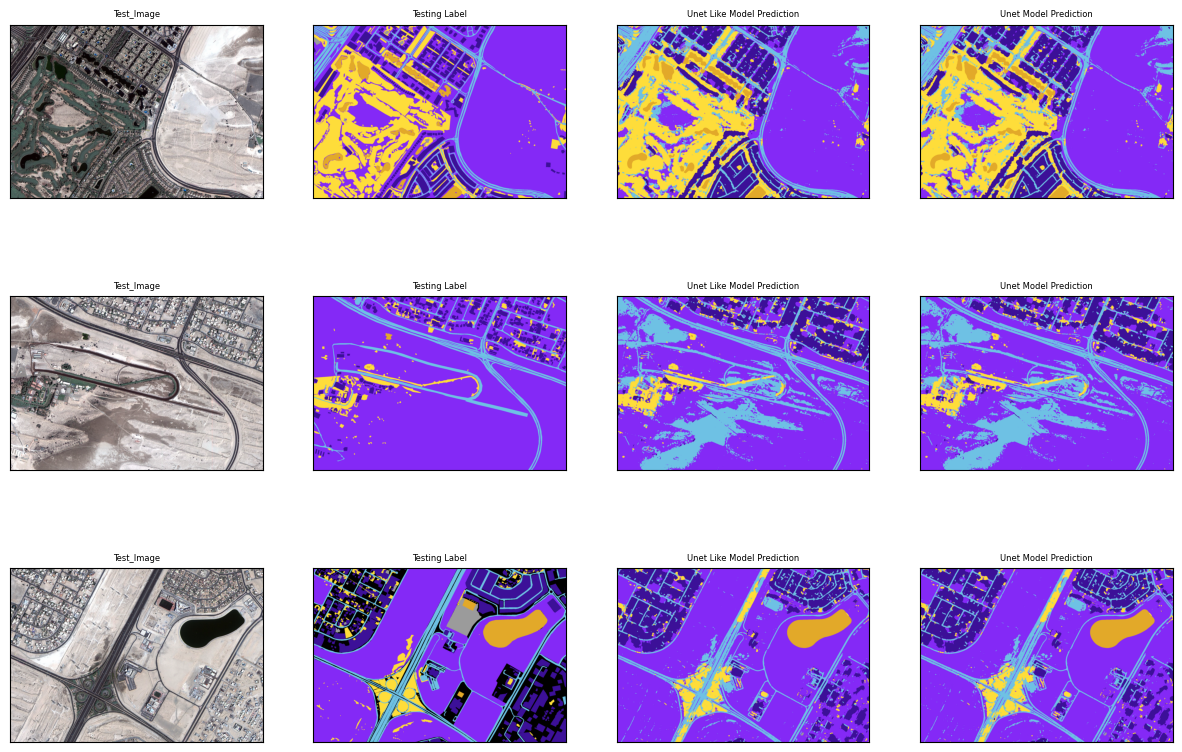

In [ ]:
def label_to_rgb(predicted_image):
    
    Building = '#3C1098'.lstrip('#')
    Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152
    
    Land = '#8429F6'.lstrip('#')
    Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246
    
    Road = '#6EC1E4'.lstrip('#') 
    Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228
    
    Vegetation =  'FEDD3A'.lstrip('#') 
    Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58
    
    Water = 'E2A929'.lstrip('#') 
    Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41
    
    Unlabeled = '#9B9B9B'.lstrip('#') 
    Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155
    
    
    
    segmented_img = np.empty((predicted_image.shape[0], predicted_image.shape[1], 3))
    
    segmented_img[(predicted_image == 0)] = Building
    segmented_img[(predicted_image == 1)] = Land
    segmented_img[(predicted_image == 2)] = Road
    segmented_img[(predicted_image == 3)] = Vegetation
    segmented_img[(predicted_image == 4)] = Water
    segmented_img[(predicted_image == 5)] = Unlabeled
    
    segmented_img = segmented_img.astype(np.uint8)
    return(segmented_img)

fig, axis = plt.subplots(3, 4)
fig.set_figwidth(15)
fig.set_figheight(10)

for img_num in range(test_num_images):   
    
    test_image = cv2.imread(os.path.join(test_img_dir, test_img_list[img_num]), 1)
    axis[img_num][0].imshow(test_image)
    axis[img_num][0].set_title('Test_Image', fontsize = 6)
    axis[img_num][0].axes.xaxis.set_visible(False)
    axis[img_num][0].axes.yaxis.set_visible(False)

    test_mask = cv2.imread(os.path.join(test_mask_dir, test_mask_list[img_num]), 1)
    test_mask = cv2.cvtColor(test_mask, cv2.COLOR_BGR2RGB)
    axis[img_num][1].imshow(test_mask)
    axis[img_num][1].set_title("Testing Label", fontsize = 6)
    axis[img_num][1].axes.xaxis.set_visible(False)
    axis[img_num][1].axes.yaxis.set_visible(False)

    axis[img_num][2].imshow(label_to_rgb(unet_like_predicted_masks[img_num]))
    axis[img_num][2].set_title("Unet Like Model Prediction", fontsize = 6)
    axis[img_num][2].axes.xaxis.set_visible(False)
    axis[img_num][2].axes.yaxis.set_visible(False)

    axis[img_num][3].imshow(label_to_rgb(unet_predicted_masks[img_num]))
    axis[img_num][3].set_title("Unet Model Prediction", fontsize = 6)
    axis[img_num][3].axes.xaxis.set_visible(False)
    axis[img_num][3].axes.yaxis.set_visible(False)

    
plt.show()

## Задание №3. Используйте модель с Unet-подобной архитектурой для решения задач №2 и №3 из практической работы №6

In [ ]:
from keras.datasets import fashion_mnist, mnist
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model

import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
from IPython.display import display, Image

from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
import tensorflow as tf

from IPython.display import display, Image

In [ ]:
(X_train,Y_train),(X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#Нормализация
x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  

noise_factor = 0.07

from skimage.util import random_noise

x_train_noisy = random_noise(x_train, mode="s&p",clip=True, amount=noise_factor)
x_test_noisy = random_noise(x_test, mode="s&p",clip=True, amount=noise_factor)

In [ ]:
x_test_final_noisy = x_test_noisy[-100:]
x_test_noisy = x_test_noisy[:-100]

x_test_final_original = x_test[-100:]
x_test = x_test[:-100]

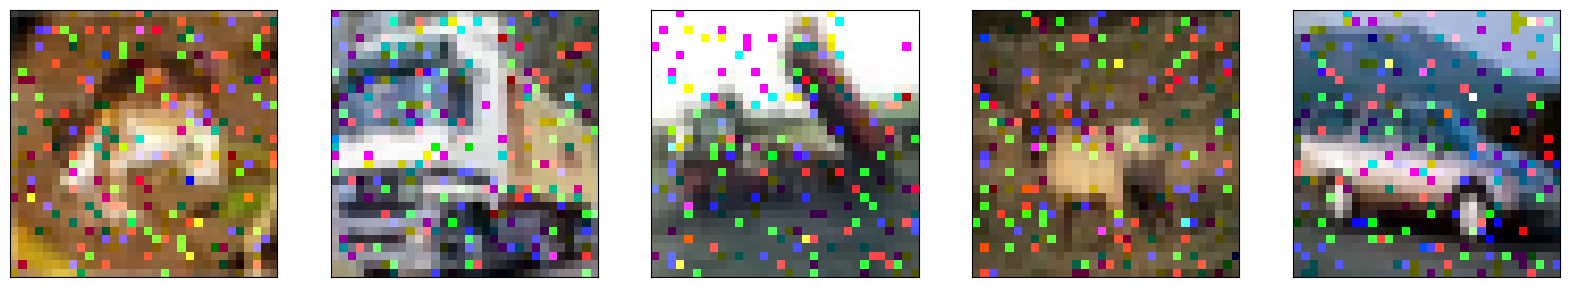

In [ ]:
n = 5
plt.figure(figsize=(20, 20))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
def build_model(input_layer, start_neurons):
    conv1 = Conv2D(start_neurons*1,(3,3), activation='relu', padding='same')(input_layer)
    conv1 = Conv2D(start_neurons*1,(3,3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2,2))(conv1)
    pool1 = Dropout(0.25)(pool1)
    
    conv2 = Conv2D(start_neurons*2,(3,3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(start_neurons*2,(3,3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2,2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv2D(start_neurons*4,(3,3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(start_neurons*4,(3,3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D((2,2))(conv3)
    pool3 = Dropout(0.5)(pool3)
    
    conv4 = Conv2D(start_neurons*8,(3,3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(start_neurons*8,(3,3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D((2,2))(conv4)
    pool4 = Dropout(0.5)(pool4)

    convm = Conv2D(start_neurons * 16, (3,3), activation='relu', padding='same')(pool4)
    convm = Conv2D(start_neurons * 16, (3,3), activation='relu', padding='same')(convm)

    deconv4 = Conv2DTranspose(start_neurons*8,(3,3), strides=(2,2), padding='same')(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_neurons*8, (3,3), activation='relu', padding='same')(uconv4)
    uconv4 = Conv2D(start_neurons*8, (3,3), activation='relu', padding='same')(uconv4)
    
    deconv3 = Conv2DTranspose(start_neurons*8,(3,3), strides=(2,2), padding='same')(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_neurons*4, (3,3), activation='relu', padding='same')(uconv3)
    uconv3 = Conv2D(start_neurons*4, (3,3), activation='relu', padding='same')(uconv3)
    
    deconv2 = Conv2DTranspose(start_neurons*8,(3,3), strides=(2,2), padding='same')(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons*2, (3,3), activation='relu', padding='same')(uconv2)
    uconv2 = Conv2D(start_neurons*2, (3,3), activation='relu', padding='same')(uconv2)
    
    deconv1 = Conv2DTranspose(start_neurons*8,(3,3), strides=(2,2), padding='same')(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons*3, (3,3), activation='relu', padding='same')(uconv1)
    uconv1 = Conv2D(start_neurons*3, (3,3), activation='relu', padding='same')(uconv1)
    
    output_layer = Conv2D(3, (1,1), padding='same', activation='sigmoid')(uconv1)
    return output_layer

In [ ]:
img_size_target = 32
input_layer = Input((img_size_target, img_size_target,3))
output_layer = build_model(input_layer,64)

In [ ]:
model_unet = Model(input_layer, output_layer)
model_unet.compile(optimizer='adam', loss='MSE')

In [ ]:
model_unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

 dropout_7 (Dropout)            (None, 32, 32, 576)  0           ['concatenate_3[0][0]']          
                                                                                                  
 conv2d_16 (Conv2D)             (None, 32, 32, 192)  995520      ['dropout_7[0][0]']              
                                                                                                  
 conv2d_17 (Conv2D)             (None, 32, 32, 192)  331968      ['conv2d_16[0][0]']              
                                                                                                  
 conv2d_18 (Conv2D)             (None, 32, 32, 3)    579         ['conv2d_17[0][0]']              
                                                                                                  
Total params: 39,344,387
Trainable params: 39,344,387
Non-trainable params: 0
__________________________________________________________________________________________________


In [ ]:
model_unet.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/5
782/782 [==============================] - 180s 216ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 2/5
782/782 [==============================] - 163s 208ms/step - loss: 0.0013 - val_loss: 6.6806e-04
Epoch 3/5
782/782 [==============================] - 163s 208ms/step - loss: 9.3033e-04 - val_loss: 5.9714e-04
Epoch 4/5
782/782 [==============================] - 163s 208ms/step - loss: 7.8849e-04 - val_loss: 8.8498e-04
Epoch 5/5
782/782 [==============================] - 163s 208ms/step - loss: 6.7301e-04 - val_loss: 0.0026


In [ ]:
predict = model_unet.predict(x_test_final_noisy)

4/4 [==============================] - 3s 303ms/step


In [ ]:
model.save(r'C:\Users\Stepan\ai\models\72.h5')

### Оригинальное изображение

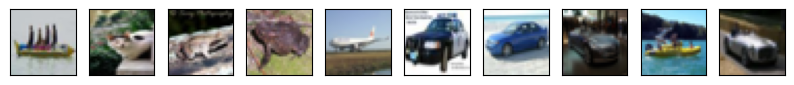

In [ ]:
n=10
plt.figure(figsize=(10, 10))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_final_original[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Зашумленное

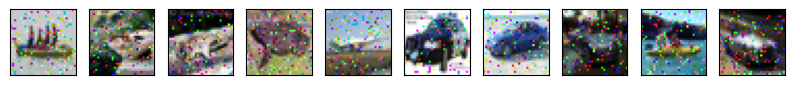

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_final_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Очищенное

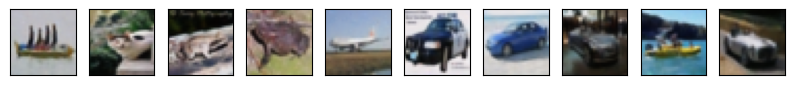

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(predict[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Upscale изображений с помощью Unet подобной архитектуры

In [ ]:
from tensorflow.keras import Model, Input
from keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, Cropping2D, Softmax, Conv2DTranspose
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import numpy as np
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
image_shape = (256, 256, 3)

In [ ]:
input_image = Input(image_shape)

conv1_1 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_1')(input_image)
dropout1_1 = Dropout(rate=0.2)(conv1_1)
conv1_2 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_2')(dropout1_1)
pool_1 = MaxPooling2D(pool_size=(2,2), name = 'pool_1')(conv1_2)
conv2_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_1')(pool_1)
dropout2_1 = Dropout(rate=0.2)(conv2_1)
conv2_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_2')(dropout2_1)
pool_2 = MaxPooling2D(pool_size=(2,2), name = 'pool_2')(conv2_2)
conv3_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_1')(pool_2)
dropout3_1 = Dropout(rate=0.2)(conv3_1)
conv3_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_2')(dropout3_1)
pool_3 = MaxPooling2D(pool_size=(2,2), name = 'pool_3')(conv3_2)
conv4_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_1')(pool_3)
dropout4_1 = Dropout(rate=0.2)(conv4_1)
conv4_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_2')(dropout4_1)
pool_4 = MaxPooling2D(pool_size=(2,2), name = 'pool_4')(conv4_2)
conv5_1 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_1')(pool_4)
dropout5_1 = Dropout(rate=0.2)(conv5_1)
conv5_2 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_2')(dropout5_1)

upconv5_1 = Conv2DTranspose(filters = 128, kernel_size = (2, 2), strides=(2, 2), activation = 'linear', padding = 'same', name = 'upconv5_1')(conv5_2)
concat_5 = concatenate([upconv5_1, conv4_2], axis = 3, name = 'concat_5')
conv6_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_1')(concat_5)
dropout6_1 = Dropout(rate=0.2)(conv6_1)
conv6_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_2')(dropout6_1)
upconv6_1 = Conv2DTranspose(filters = 64, kernel_size = (2, 2), strides=(2, 2), activation = 'linear', padding = 'same', name = 'upconv6_1')(conv6_2)
concat_6 = concatenate([upconv6_1, conv3_2], axis = 3, name = 'concat_6') 
conv7_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_1')(concat_6)
dropout7_1 = Dropout(rate=0.2)(conv7_1)
conv7_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_2')(dropout7_1)
upconv7_1 = Conv2DTranspose(filters = 32, strides=(2, 2), kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv7_1')(conv7_2)
concat_7 = concatenate([upconv7_1, conv2_2], axis = 3, name = 'concat_7')
conv8_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv8_1')(concat_7)
dropout8_1 = Dropout(rate=0.2)(conv8_1)
conv8_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv8_2')(dropout8_1)
upconv8_1 = Conv2DTranspose(filters = 16, strides=(2, 2), kernel_size = (2, 2), activation = 'linear', padding = 'same', name = 'upconv8_1')(conv8_2)
concat_8 = concatenate([upconv8_1, conv1_2], axis = 3, name = 'concat_8') 

conv9_1 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv9_1')(concat_8)
dropout9_1 = Dropout(rate=0.2)(conv9_1)
conv9_2 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv9_2')(dropout9_1)
upconv9_1 = Conv2DTranspose(filters = 8, strides=(2, 2), kernel_size = (2, 2), activation = 'linear', padding = 'same', name = 'upconv9_1')(conv9_2)

conv10 = Conv2D(filters = 3, kernel_size = (1, 1), activation = 'sigmoid', name = 'conv10')(upconv9_1)

model = Model(inputs = input_image, outputs = conv10, name = 'model')
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 256, 256, 16  448         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_44 (Dropout)           (None, 256, 256, 16  0           ['conv1_1[0][0]']                
                                )                                                             

                                )                                                                 
                                                                                                  
 conv8_2 (Conv2D)               (None, 128, 128, 32  9248        ['dropout_51[0][0]']             
                                )                                                                 
                                                                                                  
 upconv8_1 (Conv2DTranspose)    (None, 256, 256, 16  2064        ['conv8_2[0][0]']                
                                )                                                                 
                                                                                                  
 concat_8 (Concatenate)         (None, 256, 256, 32  0           ['upconv8_1[0][0]',              
                                )                                 'conv1_2[0][0]']                
          

In [ ]:
seed = 24
batch_size = 16

In [ ]:
def trainGenerator(train_img_path, hd_img_path):

    img_data_gen_args = dict(horizontal_flip=False,
                             vertical_flip=False)

    image_datagen = ImageDataGenerator(**img_data_gen_args)

    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode=None,
        target_size=(256, 256),
        batch_size=batch_size,
        seed=seed)
    
    hd_img_generator = image_datagen.flow_from_directory(
        hd_img_path,
        class_mode=None,
        target_size=(512, 512),
        batch_size=batch_size,
        seed=seed)

    train_generator = zip(image_generator, hd_img_generator)
    
    for (img, hd_img) in train_generator:
        img, hd_img = preprocess_data(img, hd_img)
        yield (img, hd_img)
        
def preprocess_data(img, hd_img):
    img = img.astype("float32") / 255.0
    hd_img = hd_img.astype("float32") / 255.0
    img = img.reshape(len(img), 256, 256, 3)
    hd_img = hd_img.reshape((len(hd_img), 512, 512, 3))
      
    return (img, hd_img)

In [ ]:
train_lr = r'C:\Users\Stepan\ai\upscale\train\lr'
train_hr = r'C:\Users\Stepan\ai\upscale\train\hr'
train_img_gen = trainGenerator(train_lr, train_hr)

val_lr = r'C:\Users\Stepan\ai\upscale\val\lr'
val_hr = r'C:\Users\Stepan\ai\upscale\val\hr'
val_img_gen = trainGenerator(val_lr, val_hr)

train_num_images = 80
val_num_images = 20

train_steps_per_epoch = train_num_images//batch_size
val_steps_per_epoch = val_num_images//batch_size

In [ ]:
history = model.fit(
    train_img_gen,
    steps_per_epoch=train_steps_per_epoch,
    batch_size=batch_size,
    epochs=100,
    verbose=1,
    validation_steps=val_steps_per_epoch,
    validation_data=val_img_gen
    )

Found 80 images belonging to 1 classes.
Found 80 images belonging to 1 classes.
Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.3491Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
5/5 [==============================] - 3s 333ms/step - loss: 0.0829 - accuracy: 0.3491 - val_loss: 0.0825 - val_accuracy: 0.3535
Epoch 2/100
5/5 [==============================] - 1s 290ms/step - loss: 0.0811 - accuracy: 0.3448 - val_loss: 0.0691 - val_accuracy: 0.3709
Epoch 3/100
5/5 [==============================] - 1s 287ms/step - loss: 0.0767 - accuracy: 0.3546 - val_loss: 0.0732 - val_accuracy: 0.3150
Epoch 4/100
5/5 [==============================] - 1s 289ms/step - loss: 0.0719 - accuracy: 0.3533 - val_loss: 0.0577 - val_accuracy: 0.3505
Epoch 5/100
5/5 [==============================] - 1s 289ms/step - loss: 0.0579 - accuracy: 0.3409 - val_loss: 0.0439 - val_accuracy: 0.3526
Epoch 6/100
5/5 [==============================] - 1s 2

5/5 [==============================] - 1s 286ms/step - loss: 0.0098 - accuracy: 0.6204 - val_loss: 0.0148 - val_accuracy: 0.6548
Epoch 58/100
5/5 [==============================] - 1s 287ms/step - loss: 0.0095 - accuracy: 0.6216 - val_loss: 0.0128 - val_accuracy: 0.6794
Epoch 59/100
5/5 [==============================] - 1s 287ms/step - loss: 0.0093 - accuracy: 0.6283 - val_loss: 0.0103 - val_accuracy: 0.7216
Epoch 60/100
5/5 [==============================] - 1s 286ms/step - loss: 0.0090 - accuracy: 0.6260 - val_loss: 0.0119 - val_accuracy: 0.7066
Epoch 61/100
5/5 [==============================] - 1s 290ms/step - loss: 0.0088 - accuracy: 0.6351 - val_loss: 0.0121 - val_accuracy: 0.7110
Epoch 62/100
5/5 [==============================] - 1s 287ms/step - loss: 0.0087 - accuracy: 0.6314 - val_loss: 0.0131 - val_accuracy: 0.6664
Epoch 63/100
5/5 [==============================] - 1s 288ms/step - loss: 0.0085 - accuracy: 0.6287 - val_loss: 0.0126 - val_accuracy: 0.7076
Epoch 64/100
5/5 [=

In [ ]:
model.save(r'C:\Users\Stepan\ai\models\upscale.h5')

In [ ]:
from keras.models import load_model

model = load_model(r'C:\Users\Stepan\ai\models\upscale.h5', compile=False)

In [ ]:
from keras.utils import img_to_array, load_img
from skimage.transform import resize

def predict(imagePath):
    orig = img_to_array(load_img(imagePath))
    test = orig.copy()
    test = resize(test, (256,256), anti_aliasing=True)
    test *= 1.0/255
    test = test.reshape((1,256,256,3))
    pred_model = model.predict(test)

    pred_model = pred_model[0]*256

    plt.figure(figsize=(10, 5))

    lr_plt = plt.subplot(1, 2, 1)
    lr_plt.set_title("Low res")
    lr_plt.axis("off")
    lr_plt.imshow(orig.astype("uint8"))

    hr_plt = plt.subplot(1, 2, 2)
    hr_plt.set_title("Upscaled")
    hr_plt.axis("off")
   # im = pred_model.astype("uint8")
   # im = im[:,:,3]
    hr_plt.imshow(pred_model.astype("uint8"))

1/1 [==============================] - 0s 13ms/step


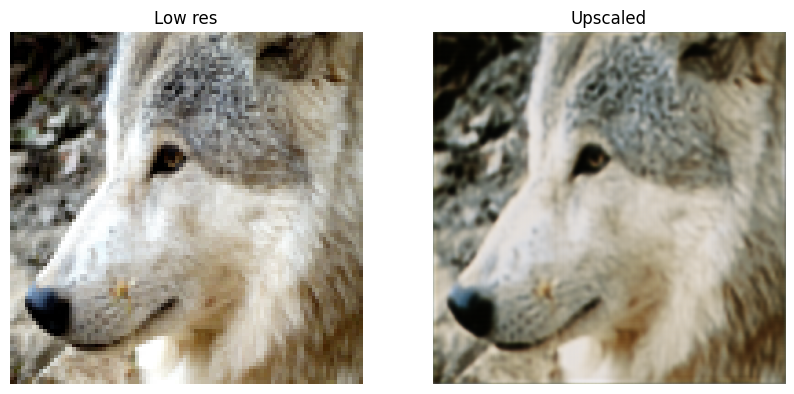

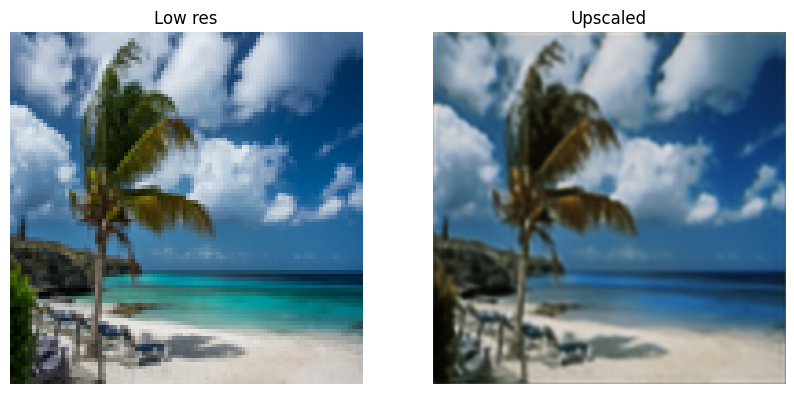

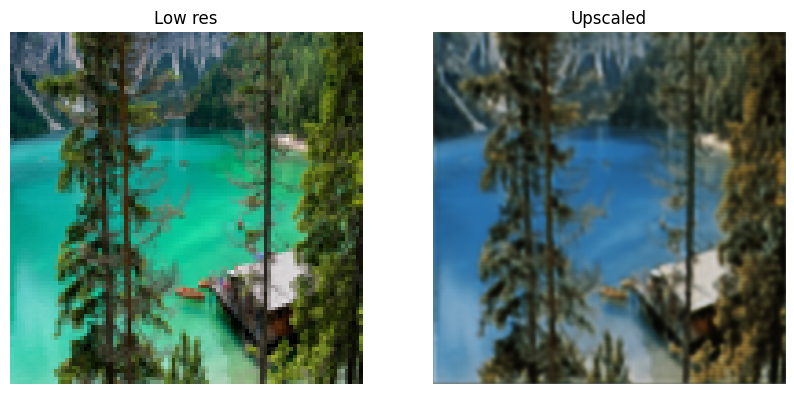

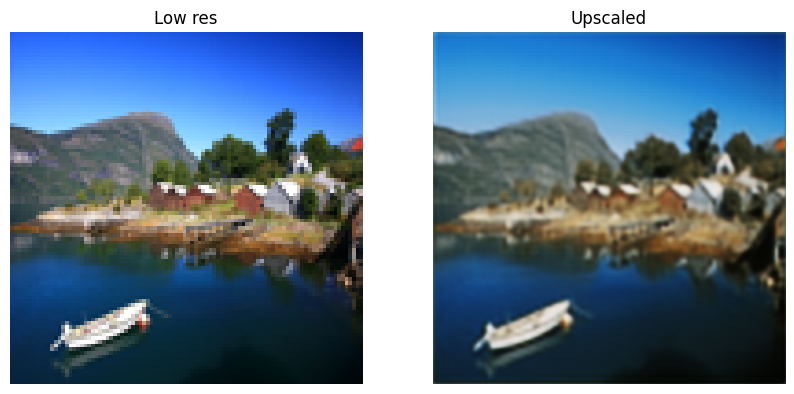

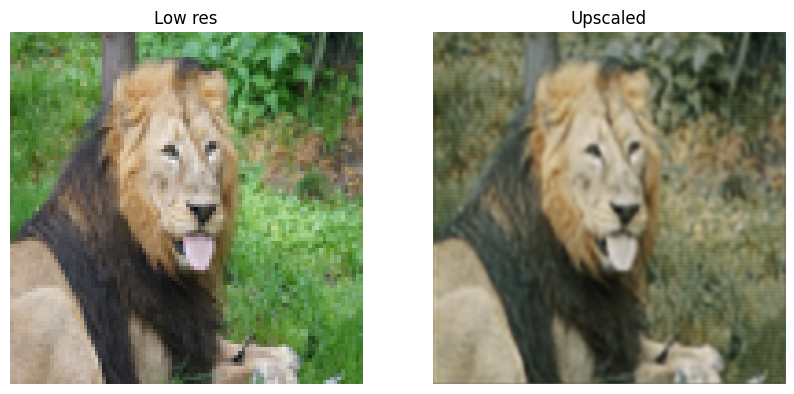

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
imagePaths = sorted(list(paths.list_images(r"C:\Users\Stepan\ai\lowres")))
for imagePath in imagePaths:
    predict(imagePath)